In [ ]:
# コードの説明：
# 同じ人物ありの異なる動画の未来外装禁止
# batch_sizeの増築やオーギュメンテーション、入力データ距離⇒点などを追加実装
# batch_sizeの増築にはtorch.catを使用する


In [1]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
import os, re, glob, shutil, random
import pandas as pd
import numpy as np
import torch.nn as nn

In [3]:
labels = ['OpenDoor', 'CloseDoor', 'OpenBottle', 'CloseBottle', 'TakeBottle', 'PutBottle', 'TakeOutBottleFromBag', 'PutBottleIntoBag', 'MoveNuclearMaterial']
datasets_forTrain = pd.DataFrame(columns=["path", "label"])
datasets_forTest = pd.DataFrame(columns=["path", "label"])
width_of_csv = 50

# 訓練用csv
for label in labels:
    path = 'INPUT/' + label + '_forTrain_csv/*.csv'
    all_csv = glob.glob(path)
    for csv in all_csv:
        df = pd.read_csv(csv)
        w = width_of_csv
        csv_num = re.sub(r"\D", "", csv)
        if len(df) < w:
            continue
        else:
            for start in range(len(df) - w + 1):
                new_df = df.loc[start : start + w -1]
                dir = 'INPUT/' + label + '_forTrain_csv/edited_csv/'
                if not os.path.isdir(dir):
                  os.makedirs(dir)
                new_df.to_csv('INPUT/' + label + '_forTrain_csv/edited_csv/edited_' +  str(csv_num) + '_' + str(start) + '_width' + str(w) + '.csv')
    dataset_path_forTrain = 'INPUT/' + label + '_forTrain_csv/edited_csv/*.csv'
    dataset_forTrain = glob.glob(dataset_path_forTrain)
    for d in dataset_forTrain:
        s = pd.Series([d, label], index=datasets_forTrain.columns)
        datasets_forTrain = datasets_forTrain.append(s, ignore_index=True)
        
# テスト用csv
for label in labels:
    path = 'INPUT/' + label + '_forTest_csv/*.csv'
    all_csv = glob.glob(path)
    for csv in all_csv:
        df = pd.read_csv(csv)
        w = width_of_csv
        csv_num = re.sub(r"\D", "", csv)
        if len(df) < w:
            continue
        else:
            for start in range(len(df) - w + 1):
                new_df = df.loc[start : start + w -1]
                dir = 'INPUT/' + label + '_forTest_csv/edited_csv/'
                if not os.path.isdir(dir):
                  os.makedirs(dir)
                new_df.to_csv('INPUT/' + label + '_forTest_csv/edited_csv/edited_' +  str(csv_num) + '_' + str(start) + '_width' + str(w) + '.csv')
    dataset_path_forTest = 'INPUT/' + label + '_forTest_csv/edited_csv/*.csv'
    dataset_forTest = glob.glob(dataset_path_forTest)
    for d in dataset_forTest:
        s = pd.Series([d, label], index=datasets_forTest.columns)
        datasets_forTest = datasets_forTest.append(s, ignore_index=True)

In [10]:
datasets_forTrain = datasets_forTrain.sample(frac=1).reset_index(drop=True)
datasets_forTest = datasets_forTest.sample(frac=1).reset_index(drop=True)
datasets_forTrain.to_csv('dataset_table_forTrain.csv')
datasets_forTest.to_csv('dataset_table_forTest.csv')

In [5]:
print(datasets_forTrain.groupby('label').count())
print(datasets_forTest.groupby('label').count())

                      Unnamed: 0  Unnamed: 0.1  path
label                                               
CloseBottle                 2049          2049  2049
CloseDoor                   3072          3072  3072
MoveNuclearMaterial         1579          1579  1579
OpenBottle                  1853          1853  1853
OpenDoor                    2199          2199  2199
PutBottle                    926           926   926
PutBottleIntoBag            2049          2049  2049
TakeBottle                   945           945   945
TakeOutBottleFromBag        2726          2726  2726
                      Unnamed: 0  Unnamed: 0.1  path
label                                               
CloseBottle                  918           918   918
CloseDoor                    277           277   277
MoveNuclearMaterial         1247          1247  1247
OpenBottle                   638           638   638
OpenDoor                     719           719   719
PutBottle                    908           908

In [59]:
datasets_forTrain

,Unnamed: 0,Unnamed: 0.1,path,label
0,0,11205,INPUT/OpenDoor_forTrain_csv/edited_csv\edited_...,OpenDoor
1,1,3793,INPUT/CloseBottle_forTrain_csv/edited_csv\edit...,CloseBottle
2,2,8374,INPUT/PutBottle_forTrain_csv/edited_csv\edited...,PutBottle
3,3,13680,INPUT/OpenDoor_forTrain_csv/edited_csv\edited_...,OpenDoor
4,4,11963,INPUT/CloseDoor_forTrain_csv/edited_csv\edited...,CloseDoor
...,...,...,...,...
17393,17393,2222,INPUT/CloseBottle_forTrain_csv/edited_csv\edit...,CloseBottle
17394,17394,10331,INPUT/PutBottleIntoBag_forTrain_csv/edited_csv...,PutBottleIntoBag
17395,17395,2350,INPUT/CloseDoor_forTrain_csv/edited_csv\edited...,CloseDoor
17396,17396,8384,INPUT/TakeBottle_forTrain_csv/edited_csv\edite...,TakeBottle


In [7]:
datasets_forTest

,Unnamed: 0,Unnamed: 0.1,path,label
0,0,3315,INPUT/CloseBottle_forTest_csv/edited_csv\edite...,CloseBottle
1,1,155,INPUT/MoveNuclearMaterial_forTest_csv/edited_c...,MoveNuclearMaterial
2,2,3120,INPUT/MoveNuclearMaterial_forTest_csv/edited_c...,MoveNuclearMaterial
3,3,6878,INPUT/OpenDoor_forTest_csv/edited_csv\edited_1...,OpenDoor
4,4,6290,INPUT/CloseBottle_forTest_csv/edited_csv\edite...,CloseBottle
...,...,...,...,...
6880,6880,1558,INPUT/PutBottle_forTest_csv/edited_csv\edited_...,PutBottle
6881,6881,1973,INPUT/TakeBottle_forTest_csv/edited_csv\edited...,TakeBottle
6882,6882,3209,INPUT/PutBottleIntoBag_forTest_csv/edited_csv\...,PutBottleIntoBag
6883,6883,1213,INPUT/OpenBottle_forTest_csv/edited_csv\edited...,OpenBottle


In [3]:
datasets_forTrain = pd.read_csv('dataset_table_forTrain.csv')
datasets_forTest = pd.read_csv('dataset_table_forTest.csv')

In [4]:
df_first = pd.read_csv(datasets_forTrain["path"][8])
df_first 

,Unnamed: 0,Unnamed: 0.1,head_x,head_y,neck_x,neck_y,R_shoulder_x,R_shoulder_y,R_elbow_x,R_elbow_y,R_wrist_x,R_wrist_y,L_shoulder_x,L_shoulder_y,L_elbow_x,L_elbow_y,L_wrist_x,L_wrist_y
0,108,108,375,555,195,525,240,540,270,780,375,945,135,510,240,840,345,960
1,109,109,375,555,195,525,240,525,270,780,390,930,135,510,240,810,420,960
2,110,110,360,570,180,525,225,525,270,780,390,930,135,510,240,810,345,960
3,111,111,360,570,180,540,240,540,270,765,390,930,135,510,210,825,285,975
4,112,112,345,570,165,540,225,525,270,765,405,930,120,525,210,795,270,960
5,113,113,345,570,180,540,240,540,270,765,420,930,135,525,240,795,270,975
6,114,114,330,570,165,540,225,540,270,765,420,930,120,525,225,810,270,975
7,115,115,345,570,180,540,225,540,270,765,420,915,135,525,210,810,270,990
8,116,116,330,570,165,540,225,540,270,765,435,915,120,540,195,810,270,975
9,117,117,345,570,165,540,225,555,300,780,435,915,120,525,165,810,270,975


In [8]:
width_of_csv = 50

In [9]:
batch_size = 16
def csvpath2tensor(path):
    csv_df = pd.read_csv(path)
    csv_list = csv_df.values.T.tolist()
    csv_list = np.delete(csv_list, [0,1,2,3], 0)
    adjusted_csv_list = []
    neck_x_mean = np.mean(csv_list[0])
    neck_y_mean = np.mean(csv_list[1])
    neck_mean = (neck_x_mean + neck_y_mean)/2
    for list in csv_list:
        l_i = [int(s) for s in list]
        list = [pd.np.nan if i == -1 else i for i in l_i]
        adjusted_series = pd.Series(list)
        adjusted_series = adjusted_series.interpolate(limit_direction='forward')
        adjusted_list = adjusted_series.values.tolist()
        remove_nan = np.nan_to_num(adjusted_list, nan=neck_mean)
        adjusted_csv_list.append(remove_nan)
    adjusted_csv_list_t = np.array(adjusted_csv_list).T.tolist()
    d_from_center_t = []
    for i, frame in enumerate(adjusted_csv_list_t):
        neck_x = frame[0]
        neck_y= frame[1]
        R_shoulder_x = abs(frame[2] - neck_x)
        R_shoulder_y = abs(frame[3] - neck_y)
        R_elbow_x = abs(frame[4] - neck_x)
        R_elbow_y = abs(frame[5] - neck_y)
        R_wrist_x = abs(frame[6] - neck_x)
        R_wrist_y = abs(frame[7] - neck_y)
        L_shoulder_x = abs(frame[8] - neck_x)
        L_shoulder_y = abs(frame[9] - neck_y)
        L_elbow_x = abs(frame[10] - neck_x)
        L_elbow_y = abs(frame[11] - neck_y)
        L_wrist_x = abs(frame[12] - neck_x)
        L_wrist_y = abs(frame[13] - neck_y)
        d_from_center_elem = [R_shoulder_x, R_shoulder_y, R_elbow_x, R_elbow_y, R_wrist_x, R_wrist_y, L_shoulder_x, L_shoulder_y, L_elbow_x, L_elbow_y, L_wrist_x, L_wrist_y]
        d_from_center_t.append(d_from_center_elem)
    d_from_center = np.array(d_from_center_t).T.tolist()
    normalized_d_from_center = []
    for keys in d_from_center:
        key_min = min(keys)
        key_max = max(keys)
        if (key_min == key_max):
            diff = 1
        else:
            diff = key_max - key_min
        normalized_keys = [round((i - key_min) / diff,4) for i in keys]
        normalized_d_from_center.append(normalized_keys)
    augumented_data = []
    for n in range(batch_size):
        augumented_keys = []
        for each_key in normalized_d_from_center:
            augumented_times = []
            for each_time in each_key:
                r = round(random.uniform(-0.01,0.01),5)
                augumented_each_time = each_time + r
                augumented_times.append(augumented_each_time)
            augumented_keys.append(augumented_times)
            augumented_keys_tensor = torch.tensor(augumented_keys)
        augumented_keys_tensor_3d = augumented_keys_tensor.view(12,1,width_of_csv)
        augumented_data.append(augumented_keys_tensor_3d)
    csv_tensor = torch.cat(augumented_data, dim=1)
    return csv_tensor

# 動作確認
print(csvpath2tensor(datasets_forTrain['path'][8]))
for n in range(5):
    print(csvpath2tensor(datasets_forTrain['path'][n]).size())

C:\Users\yuto-\anaconda3\envs\objectpose\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if sys.path[0] == '':


tensor([[[ 3.3308e-01,  3.3920e-01,  3.2810e-01,  ...,  4.5000e-03,
           1.5795e-01,  3.4098e-01],
         [ 3.3279e-01,  3.3491e-01,  3.2356e-01,  ..., -6.1000e-03,
           1.5930e-01,  3.2428e-01],
         [ 3.3181e-01,  3.3651e-01,  3.3520e-01,  ...,  3.2800e-03,
           1.6713e-01,  3.3415e-01],
         ...,
         [ 3.2350e-01,  3.4131e-01,  3.3260e-01,  ..., -9.3400e-03,
           1.6652e-01,  3.2988e-01],
         [ 3.3730e-01,  3.3946e-01,  3.4075e-01,  ...,  2.5100e-03,
           1.5706e-01,  3.3526e-01],
         [ 3.3018e-01,  3.2413e-01,  3.2945e-01,  ..., -4.5400e-03,
           1.6655e-01,  3.2744e-01]],

        [[ 5.0108e-01,  9.8600e-03,  7.9800e-03,  ...,  1.0083e+00,
           1.0019e+00,  9.9302e-01],
         [ 4.9672e-01,  9.9100e-03,  6.2300e-03,  ...,  1.0025e+00,
           9.9057e-01,  1.0050e+00],
         [ 4.9185e-01,  1.0900e-03,  5.7100e-03,  ...,  1.0038e+00,
           9.9308e-01,  9.9227e-01],
         ...,
         [ 5.0613e-01, -1

In [103]:
# LSTMの入力用に次元を合わせる

# batch_size = 16
# normalized_data = csvpath2tensor(datasets_forTrain['path'][2]).view(len(csvpath2tensor(datasets_forTrain['path'][2])), batch_size, -1)
# print(normalized_data.size())


In [10]:
# モデル例

HIDDEN_DIM = 128
lstm = nn.LSTM(width_of_csv,HIDDEN_DIM)
out1, out2 = lstm(csvpath2tensor(datasets_forTrain['path'][2]))
print(out1)
print(out2)
print(out1.size())


tensor([[[-0.0387, -0.0748,  0.0670,  ...,  0.0089,  0.0559, -0.0675],
         [-0.0380, -0.0734,  0.0655,  ...,  0.0090,  0.0569, -0.0677],
         [-0.0382, -0.0723,  0.0654,  ...,  0.0110,  0.0568, -0.0673],
         ...,
         [-0.0378, -0.0735,  0.0664,  ...,  0.0083,  0.0572, -0.0685],
         [-0.0382, -0.0734,  0.0650,  ...,  0.0093,  0.0560, -0.0667],
         [-0.0388, -0.0721,  0.0671,  ...,  0.0082,  0.0568, -0.0683]],

        [[-0.0177, -0.0939,  0.1339,  ...,  0.0208,  0.0632, -0.1288],
         [-0.0169, -0.0929,  0.1328,  ...,  0.0211,  0.0643, -0.1277],
         [-0.0165, -0.0934,  0.1331,  ...,  0.0234,  0.0640, -0.1279],
         ...,
         [-0.0174, -0.0938,  0.1332,  ...,  0.0214,  0.0639, -0.1292],
         [-0.0184, -0.0930,  0.1328,  ...,  0.0225,  0.0641, -0.1278],
         [-0.0177, -0.0922,  0.1342,  ...,  0.0219,  0.0642, -0.1289]],

        [[-0.0508, -0.1262,  0.1149,  ...,  0.0296,  0.0716, -0.0925],
         [-0.0499, -0.1266,  0.1135,  ...,  0

In [11]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_dim, tagset_size):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_size, hidden_dim)
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        _, lstm_out = self.lstm(x)
        tag_space = self.hidden2tag(lstm_out[0].view(-1, self.hidden_dim))
        tag_scores = self.softmax(tag_space)
        return tag_scores

label2index = {'OpenDoor':0, 'CloseDoor':1, 'OpenBottle':2, 'CloseBottle':3, 'TakeBottle':4, 'PutBottle':5, 'TakeOutBottleFromBag':6, 'PutBottleIntoBag':7, 'MoveNuclearMaterial':8}
def label2tensor(label):
    return torch.tensor([label2index[label]]*batch_size, dtype=torch.long)

print(label2tensor('MoveNuclearMaterial'))

tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])


In [92]:
# 学習

import torch.optim as optim

traindata, testdata = datasets_forTrain, datasets_forTest
INPUT_SIZE = width_of_csv
HIDDEN_DIM = 128
TAG_SIZE = 9
model = LSTMClassifier(INPUT_SIZE, HIDDEN_DIM, TAG_SIZE).to(device)
loss_function = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []
train_accs = []
val_accs = []
best_acc = 0
best_model = None
for epoch in range(12):
    train_all_loss = 0 #損失の合計
    train_a = 0 #正解の件数
    train_num = len(traindata)
    for path, label in zip(traindata["path"], traindata["label"]):
        model.zero_grad()
        model.train()
        inputs = csvpath2tensor(path)
        inputs = inputs.to(device, dtype=torch.float)
        out = model(inputs)
        _, predict = torch.max(out, 1)
        answer = label2tensor(label).to(device)
        if predict[0] == answer[0]:
                train_a += 1
        loss = loss_function(out, answer)
        loss.backward()
        optimizer.step()
        train_all_loss += loss.item()
    train_accs.append(train_a / train_num)
    train_losses.append(train_all_loss)
    print("epoch", epoch, "\t" , "train-loss", train_all_loss, "train-acc : ", train_a / train_num)
    
    test_all_loss = 0 #損失の合計
    test_a = 0 #正解の件数
    test_num = len(testdata)
    for path, label in zip(testdata["path"], testdata["label"]):
        model.zero_grad()
        inputs = csvpath2tensor(path)
        inputs = inputs.to(device, dtype=torch.float)
        out = model(inputs)
        _, predict = torch.max(out, 1)
        answer = label2tensor(label).to(device)
        if predict[0] == answer[0]:
                test_a += 1
        loss = loss_function(out, answer)
        loss.backward()
        optimizer.step()
        test_all_loss += loss.item()
    val_losses.append(test_all_loss)
    val_accs.append(test_a / test_num)
    print("epoch", epoch, "\t" , "test-loss", test_all_loss, "test-acc : ", test_a / test_num)
        
    current_acc = test_a / test_num
    if current_acc > best_acc:
        torch.save(model.state_dict(), 'lr0001ep12.pth')
        best_acc = current_acc
        best_model = model
        
print("done.")

C:\Users\yuto-\anaconda3\envs\objectpose\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if sys.path[0] == '':


epoch 0 	 train-loss 28442.948969243094 train-acc :  0.40631107023795837
epoch 0 	 test-loss 5979.056659216643 test-acc :  0.7058823529411765
epoch 1 	 train-loss 16545.229281032414 train-acc :  0.6732383032532475
epoch 1 	 test-loss 3658.976889426689 test-acc :  0.824400871459695
epoch 2 	 train-loss 10529.704914940403 train-acc :  0.801011610529946
epoch 2 	 test-loss 2782.1530111103893 test-acc :  0.8726216412490923
epoch 3 	 train-loss 7892.602995097325 train-acc :  0.8479710311530061
epoch 3 	 test-loss 2951.6504354935596 test-acc :  0.8608569353667392
epoch 4 	 train-loss 6911.767417019159 train-acc :  0.8676284630417289
epoch 4 	 test-loss 2481.839405644059 test-acc :  0.8855482933914306
epoch 5 	 train-loss 6827.279723181171 train-acc :  0.8687205425911024
epoch 5 	 test-loss 2364.9142016019705 test-acc :  0.8839506172839506
epoch 6 	 train-loss 6662.475683758848 train-acc :  0.8740659845959305
epoch 6 	 test-loss 2355.9074511932486 test-acc :  0.8848220769789398
epoch 7 	 trai

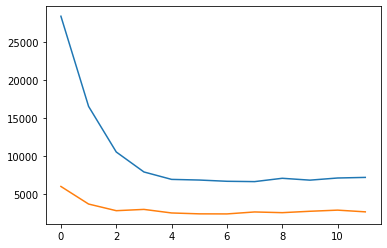

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses)
plt.plot(val_losses)

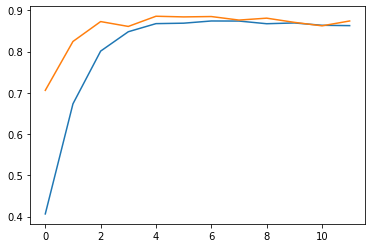

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_accs)
plt.plot(val_accs)

In [93]:
import seaborn as sns

model.load_state_dict(torch.load('lr0001ep12.pth'))
best_model = model
predict_list = []
label_list = []
for i in range(len(testdata)):
    path = testdata['path'][i]
    label = testdata['label'][i]
    inputs = csvpath2tensor(path)
    inputs = inputs.to(device, dtype=torch.float)
    out = best_model(inputs)
    _, predict = torch.max(out, 1)
    answer = label2tensor(label).to(device)
    predict_list.append(int(predict[0]))
    label_list.append(int(answer[0]))

conf_matrix = [[0] * 9 for i in range(9)]
for p, l in zip(predict_list,label_list):
    conf_matrix[p][l] += 1
conf_matrix_df = pd.DataFrame(conf_matrix)
cm = sns.light_palette("green", as_cmap=True)
conf_matrix_df.style.background_gradient(cmap=cm)
    

C:\Users\yuto-\anaconda3\envs\objectpose\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if sys.path[0] == '':


,0,1,2,3,4,5,6,7,8
0,686,9,5,8,1,1,9,7,6
1,0,246,0,5,1,1,1,0,1
2,8,4,577,62,8,7,19,15,14
3,5,6,19,815,1,3,18,6,7
4,8,0,7,2,912,2,1,0,4
5,0,0,1,2,1,866,0,0,9
6,4,2,1,3,2,6,637,12,0
7,2,1,0,0,2,0,10,459,0
8,6,9,28,21,5,22,36,15,1206
